## Analyze: Cpoke Timing Relative to Go With/Out Warm Up Trials

Question: how does cpoke timing histogram and over days plot change with warm up trials excluded (when you may be much closer to go)

Hypothesis: this will not change the "jumping the go cue" phenomenon seen in V1 growing stages because this is primarily due to the growth algorithm (not just warm up trials)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import pandas as pd

import sys
sys.path.append('/Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/_active_experiments/FixationGrower')
# Path to the 'meetings' directory where your .py file resides
meetings_path = "/Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/meetings"
if meetings_path not in sys.path:
    sys.path.append(meetings_path)
import config_alpha_experiment as alpha_config

import behav_viz.visualize as viz
import behav_viz.utils as utils
from behav_viz.utils import plot_utils as pu
from TCM_mtg_2024_09_05_FixationExperiment import *
FIGURES_PATH = utils.dir_utils.get_figures_path("rats", "alpha")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

DATA_PATH = "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/meetings/2024_12_LabMeeting/"

## 0. Load Data


In [4]:
tdf = pd.read_csv(DATA_PATH + "2024_12_lab_meeting_alpha_trials.csv", low_memory=False)

In [7]:
tdf_no_warm_up = tdf.query("warm_up_imp == 0").copy()

In [22]:
len(tdf), len(tdf_no_warm_up)

(163291, 158901)

<Axes: >

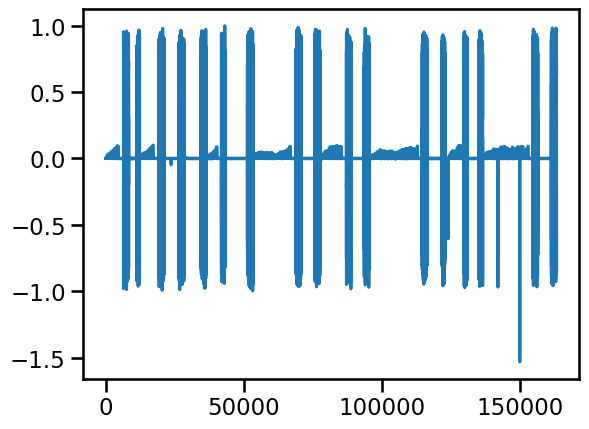

In [25]:
tdf.groupby(["animal_id", "date"]).fixation_dur.diff().plot()

<Axes: >

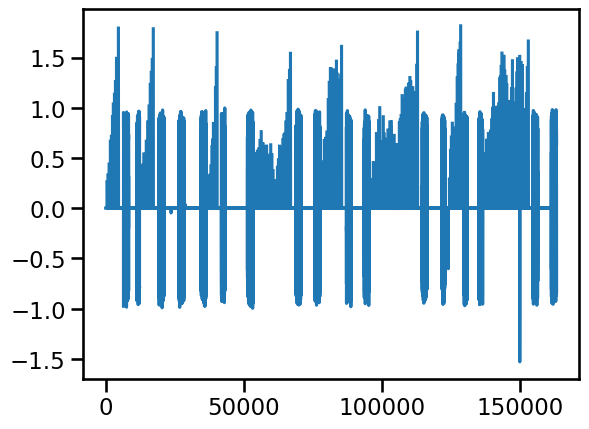

In [26]:
tdf_no_warm_up.groupby(["animal_id", "date"]).fixation_dur.diff().plot()

## 1. Overall Timing W/ W/o Warm up


In [12]:
def plot_overall_timing(df, ax=None, title=None):
    for fix_exp, sub_df in df.groupby("fix_experiment", observed=True):
        fig, ax = pu.make_fig()
        plot_df = sub_df.query("stage >=5 and stage < 11").copy()
        viz.FixationGrower.plots.plot_cpoke_dur_distributions_prettier(
            plot_df,
            xmin=-3,
            xmax=2,
            title=f"{fix_exp} Cpoke Timing {title}",
            title_color=pu.ALPHA_V1_color if fix_exp == "V1" else pu.ALPHA_V2_color,
            ax=ax,
        )
        sns.despine()

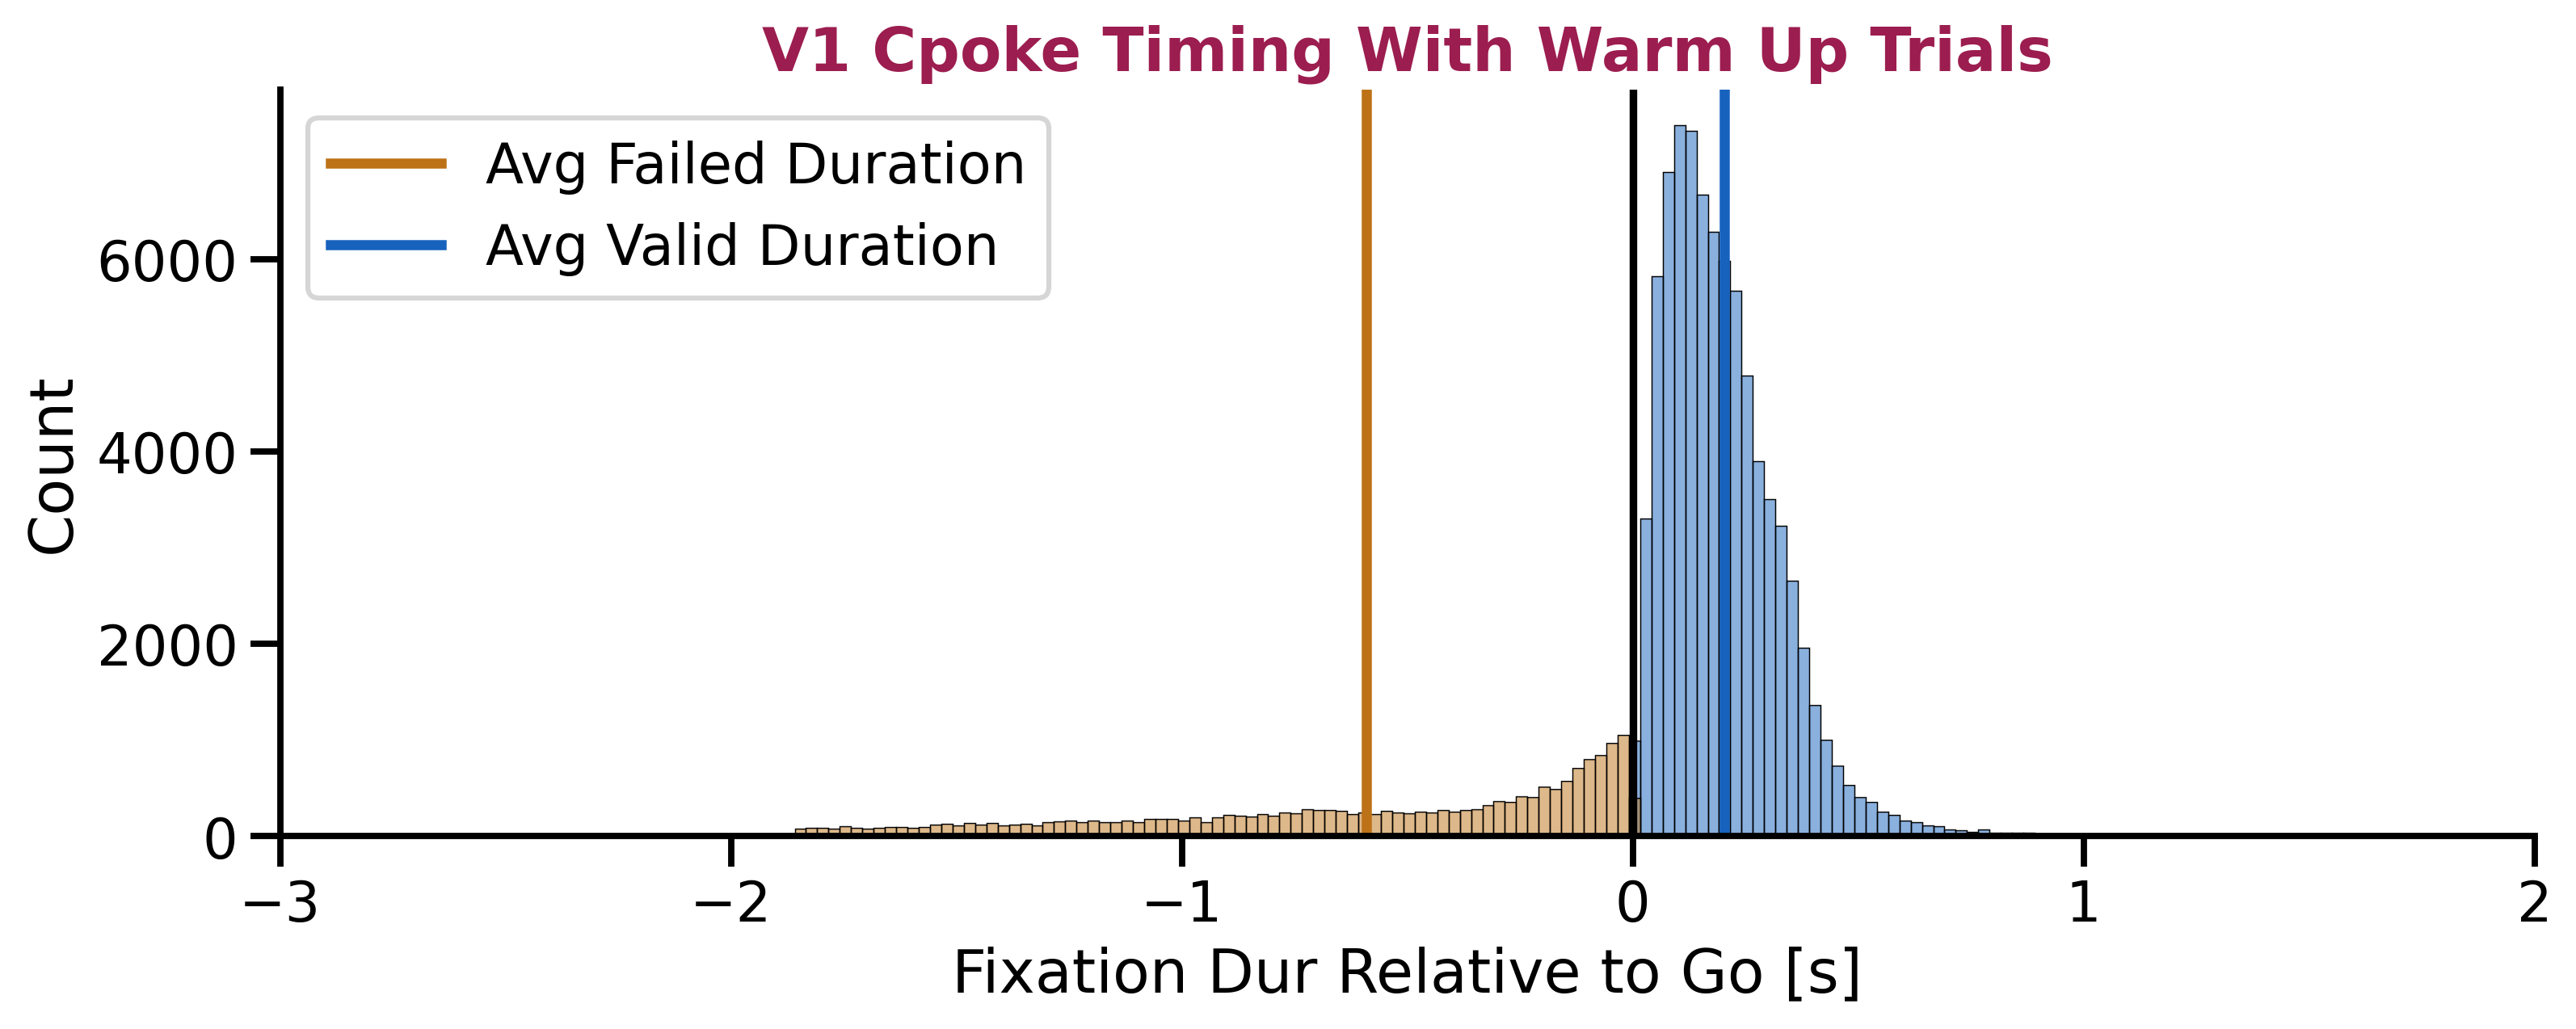

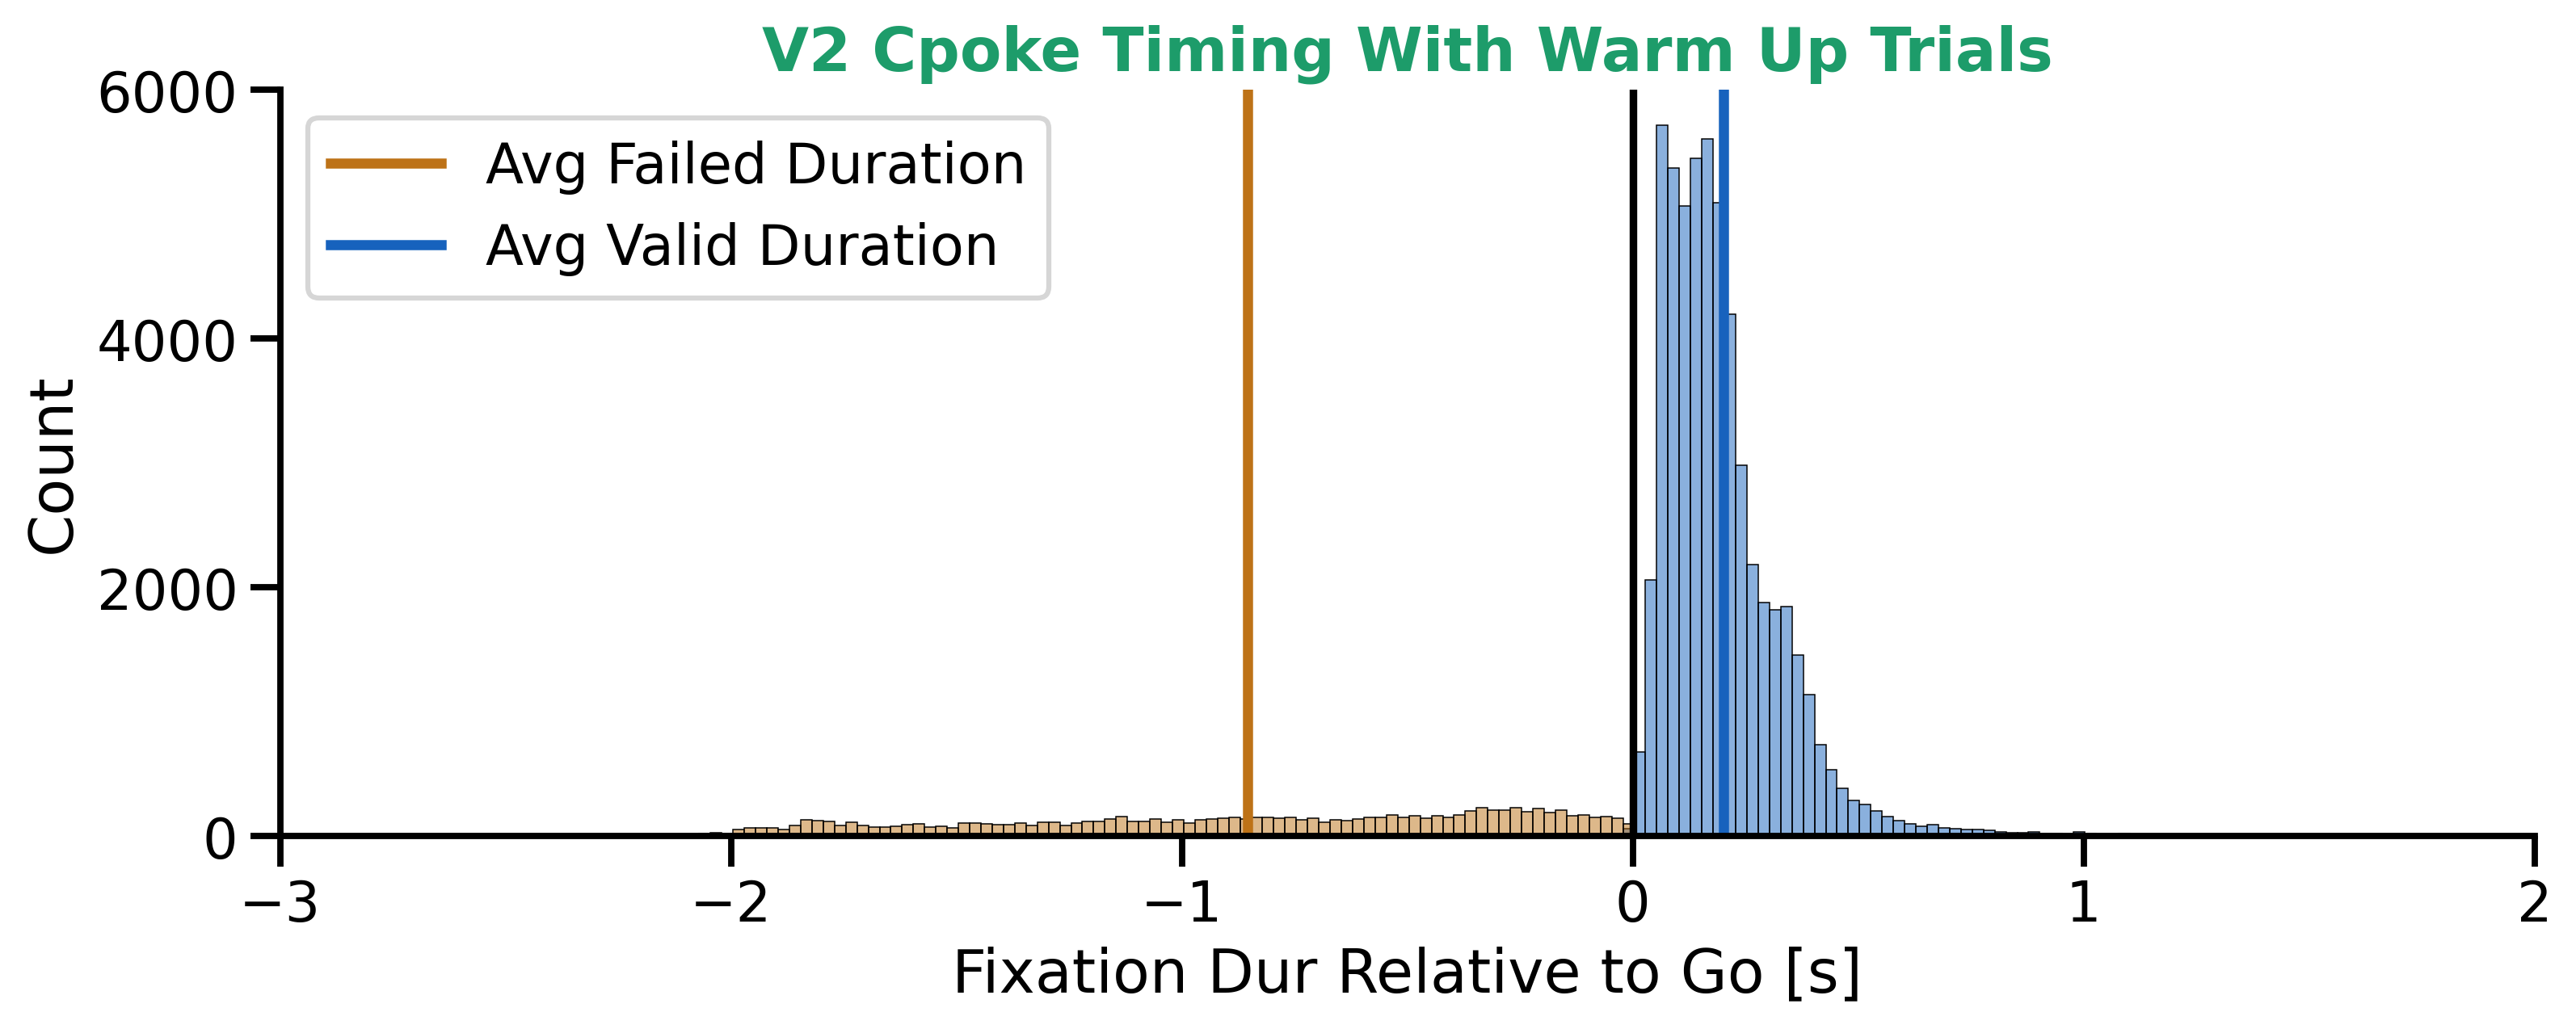

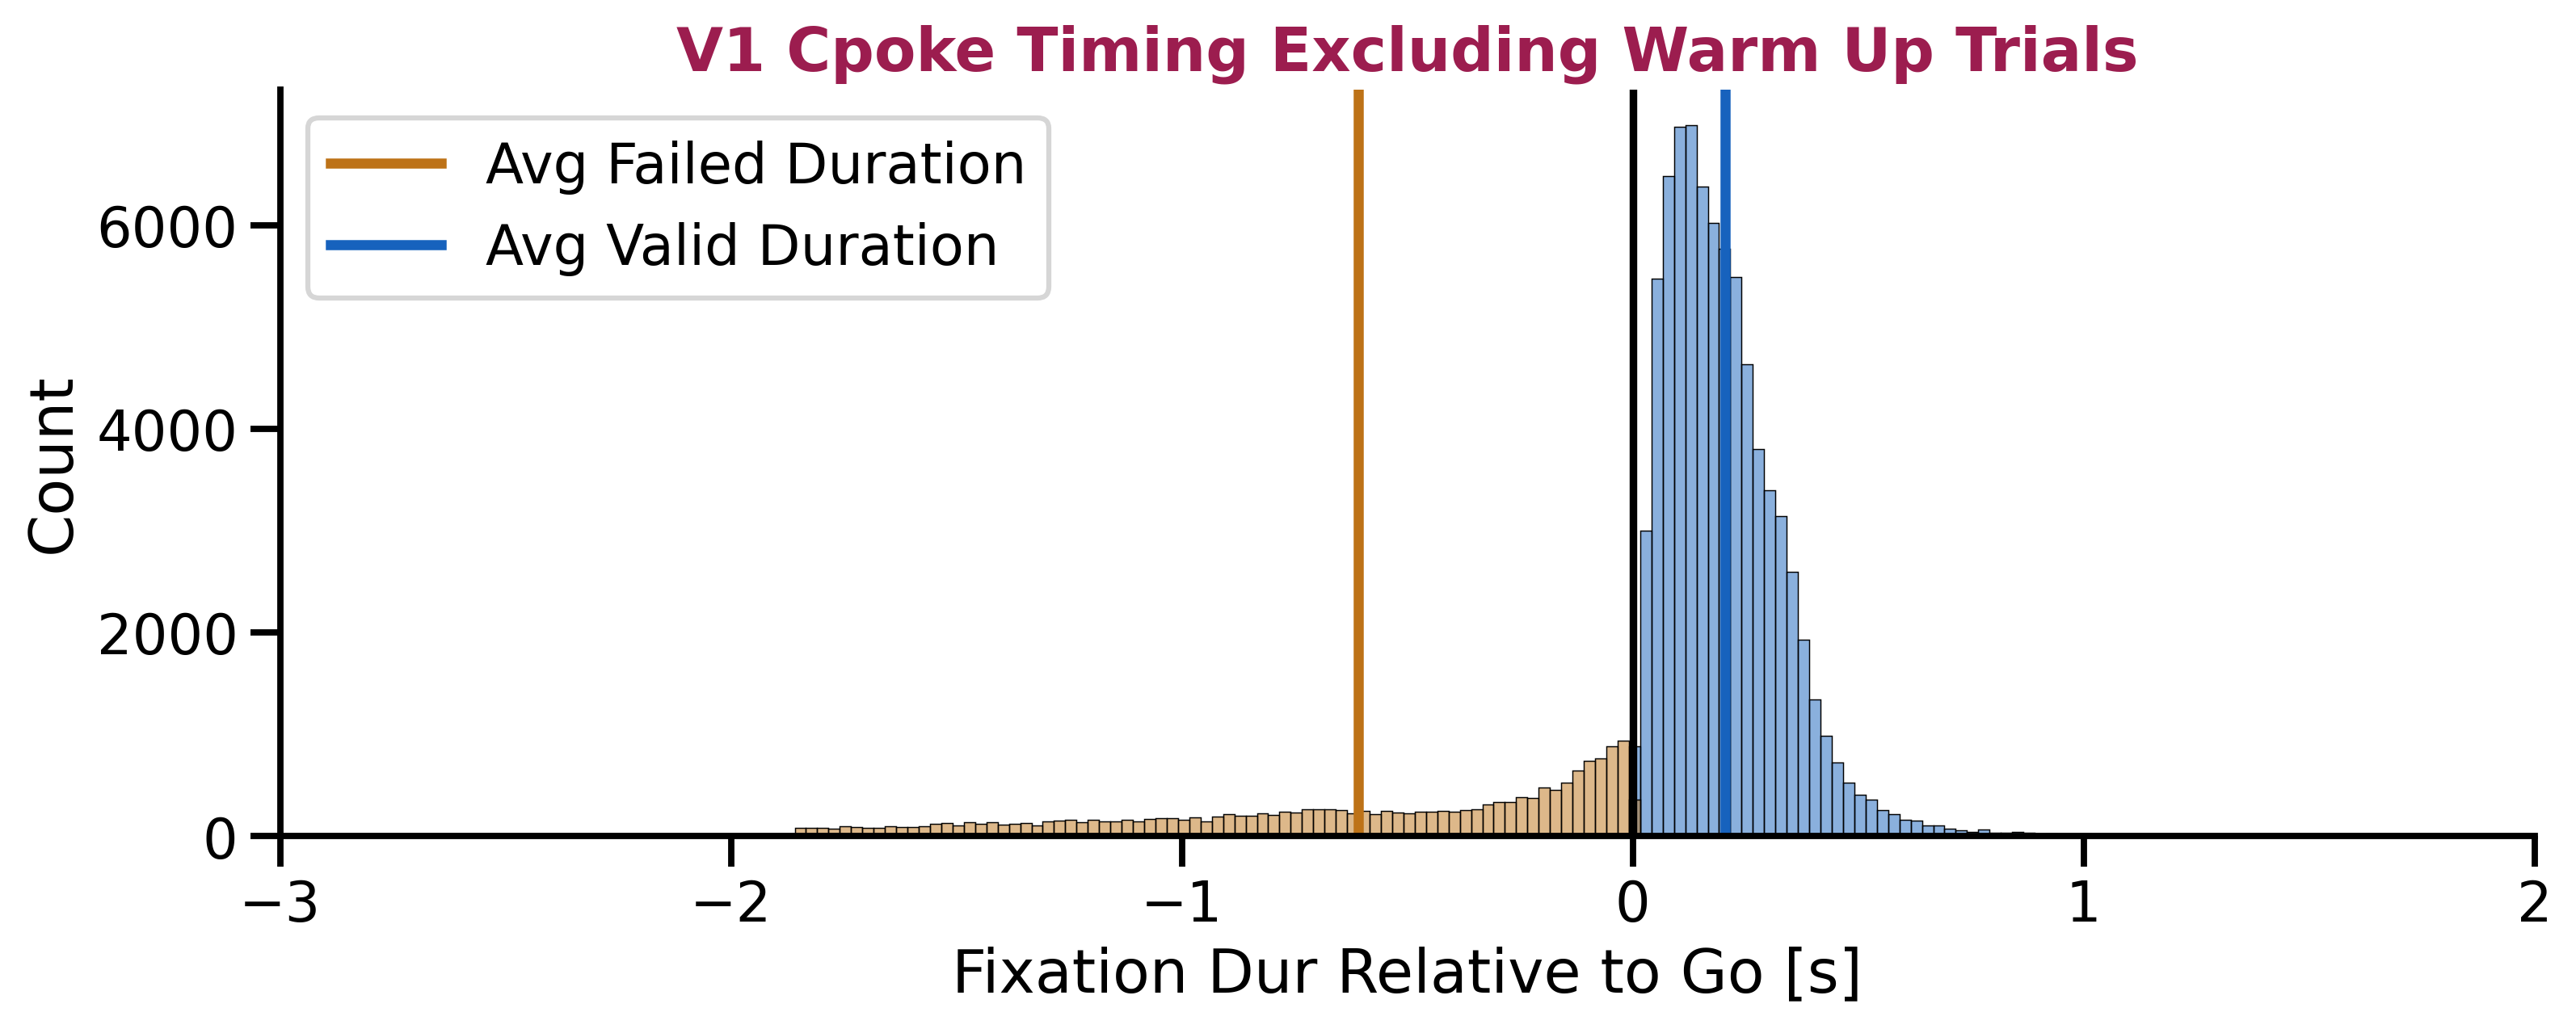

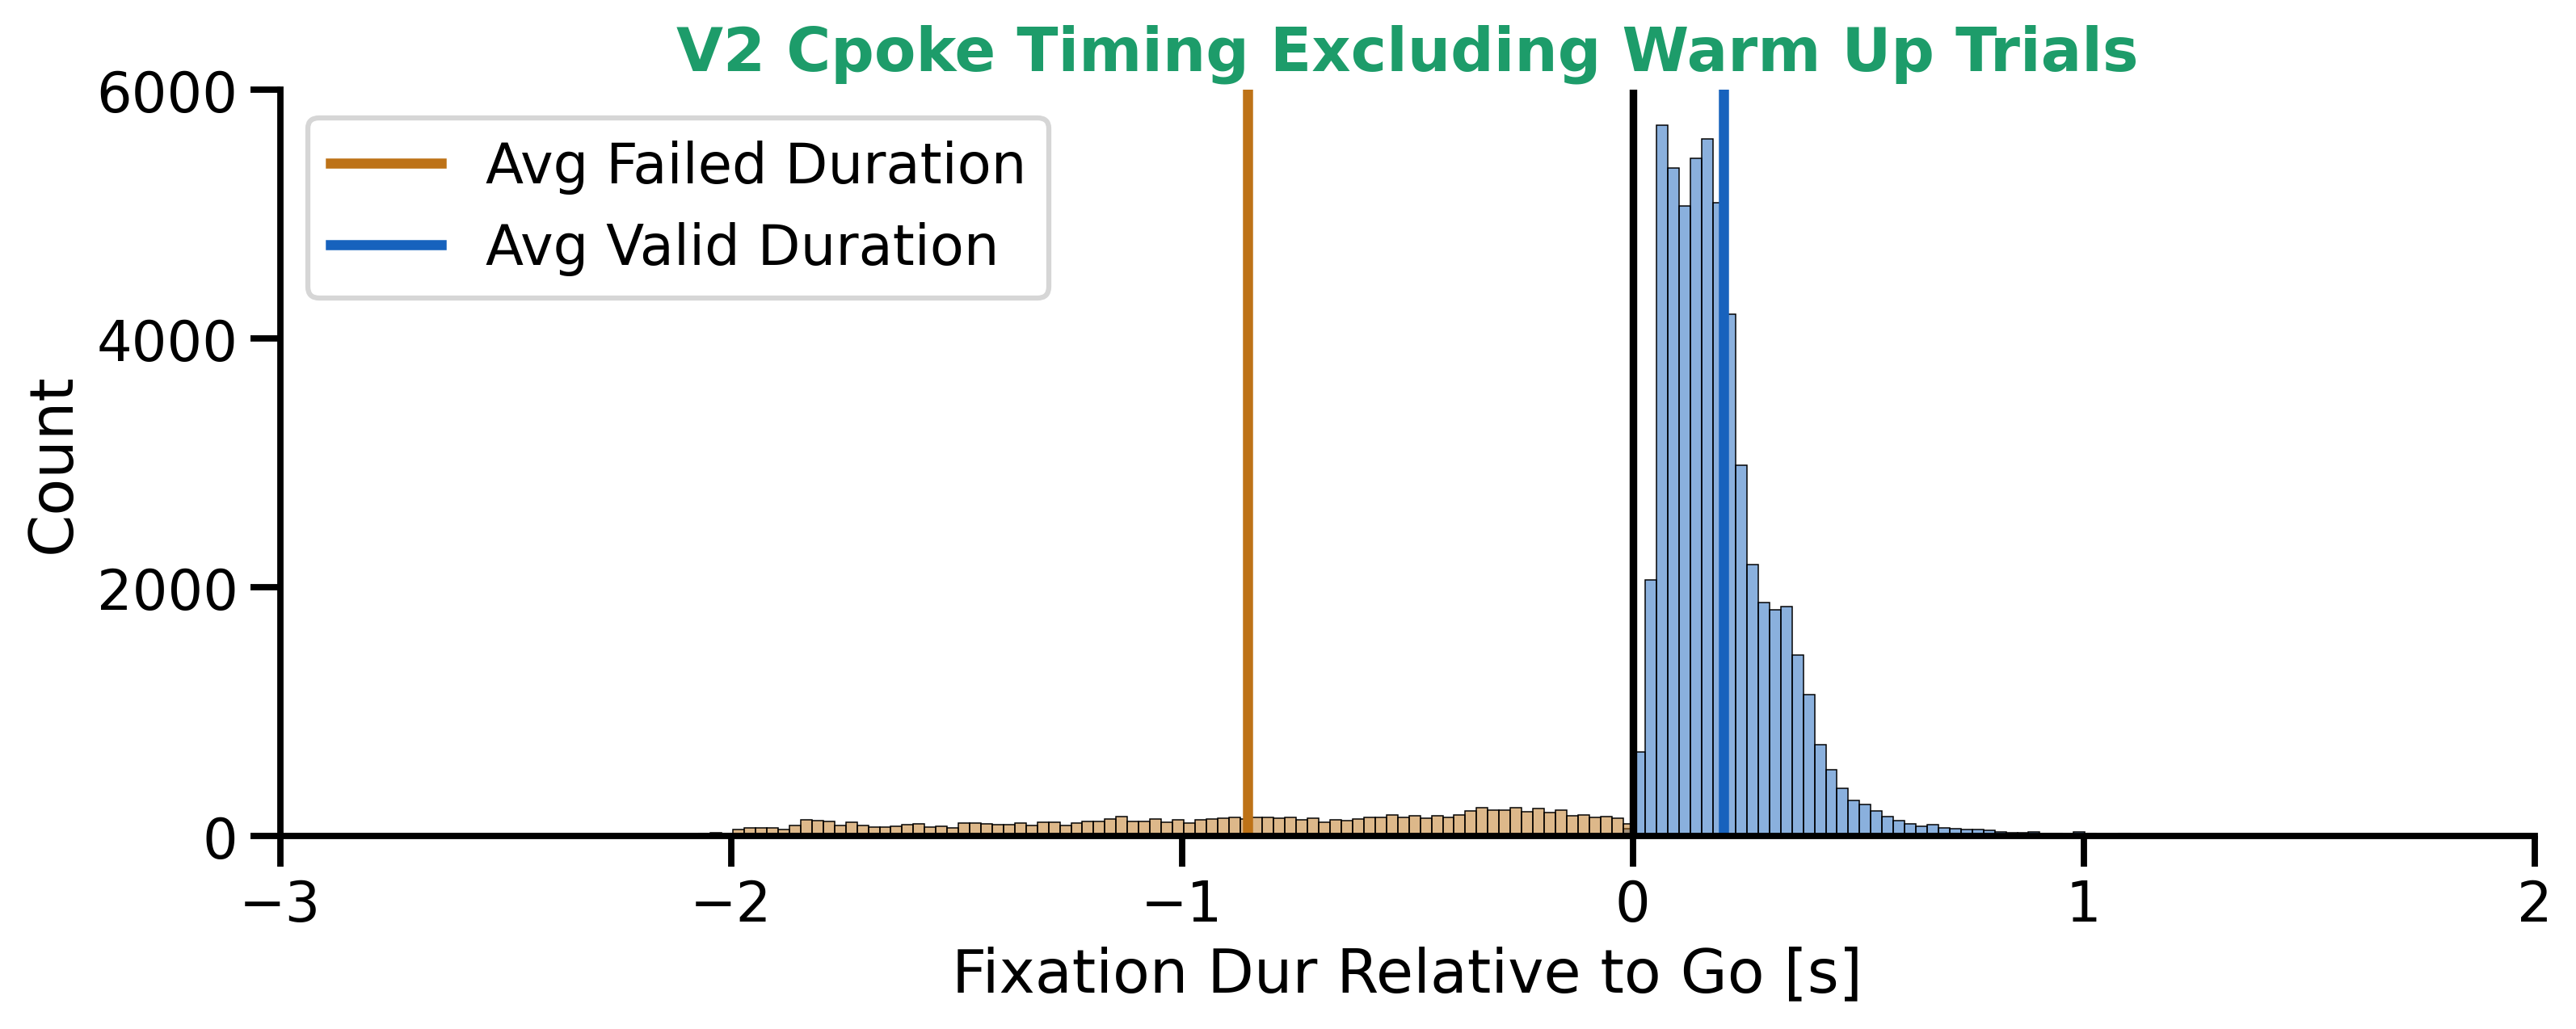

In [35]:
plot_overall_timing(tdf, title="With Warm Up Trials")
plot_overall_timing(tdf_no_warm_up, title="Excluding Warm Up Trials")

## 2. Timing by Growth/Probe Stages


In [17]:
growing_stages = [5, 6, 7]
probe_stages = [9, 10]

In [18]:
def plot_timing_by_stage(df, title_suffix, super_title=None):
    # Create a 2x2 subplot
    fig, axes = plt.subplots(2, 2, figsize=(23, 10), dpi=300)

    # Set super title if provided
    if super_title:
        fig.suptitle(super_title, fontsize=16)

    # Top left: V1 Growing
    viz.FixationGrower.plots.plot_cpoke_dur_distributions_prettier(
        df.query("fix_experiment == 'V1' and stage in @growing_stages").copy(),
        xmin=-3,
        xmax=2,
        title=f"V1 Growing Stages {title_suffix}",
        title_color=pu.ALPHA_V1_color,
        ax=axes[0, 0],
    )
    sns.despine(ax=axes[0, 0])

    # Top right: V1 Probe
    viz.FixationGrower.plots.plot_cpoke_dur_distributions_prettier(
        df.query("fix_experiment == 'V1' and stage in @probe_stages").copy(),
        xmin=-3,
        xmax=2,
        title=f"V1 Probe Stages {title_suffix}",
        title_color=pu.ALPHA_V1_color,
        ax=axes[0, 1],
    )
    sns.despine(ax=axes[0, 1])

    # Bottom left: V2 Growing
    viz.FixationGrower.plots.plot_cpoke_dur_distributions_prettier(
        df.query("fix_experiment == 'V2' and stage in @growing_stages").copy(),
        xmin=-3,
        xmax=2,
        title=f"V2 Growing Stages {title_suffix}",
        title_color=pu.ALPHA_V2_color,
        ax=axes[1, 0],
    )
    sns.despine(ax=axes[1, 0])

    # Bottom right: V2 Probe
    viz.FixationGrower.plots.plot_cpoke_dur_distributions_prettier(
        df.query("fix_experiment == 'V2' and stage in @probe_stages").copy(),
        xmin=-3,
        xmax=2,
        title=f"V2 Probe Stages {title_suffix}",
        title_color=pu.ALPHA_V2_color,
        ax=axes[1, 1],
    )
    sns.despine(ax=axes[1, 1])

    # Adjust layout
    plt.tight_layout()
    plt.show()

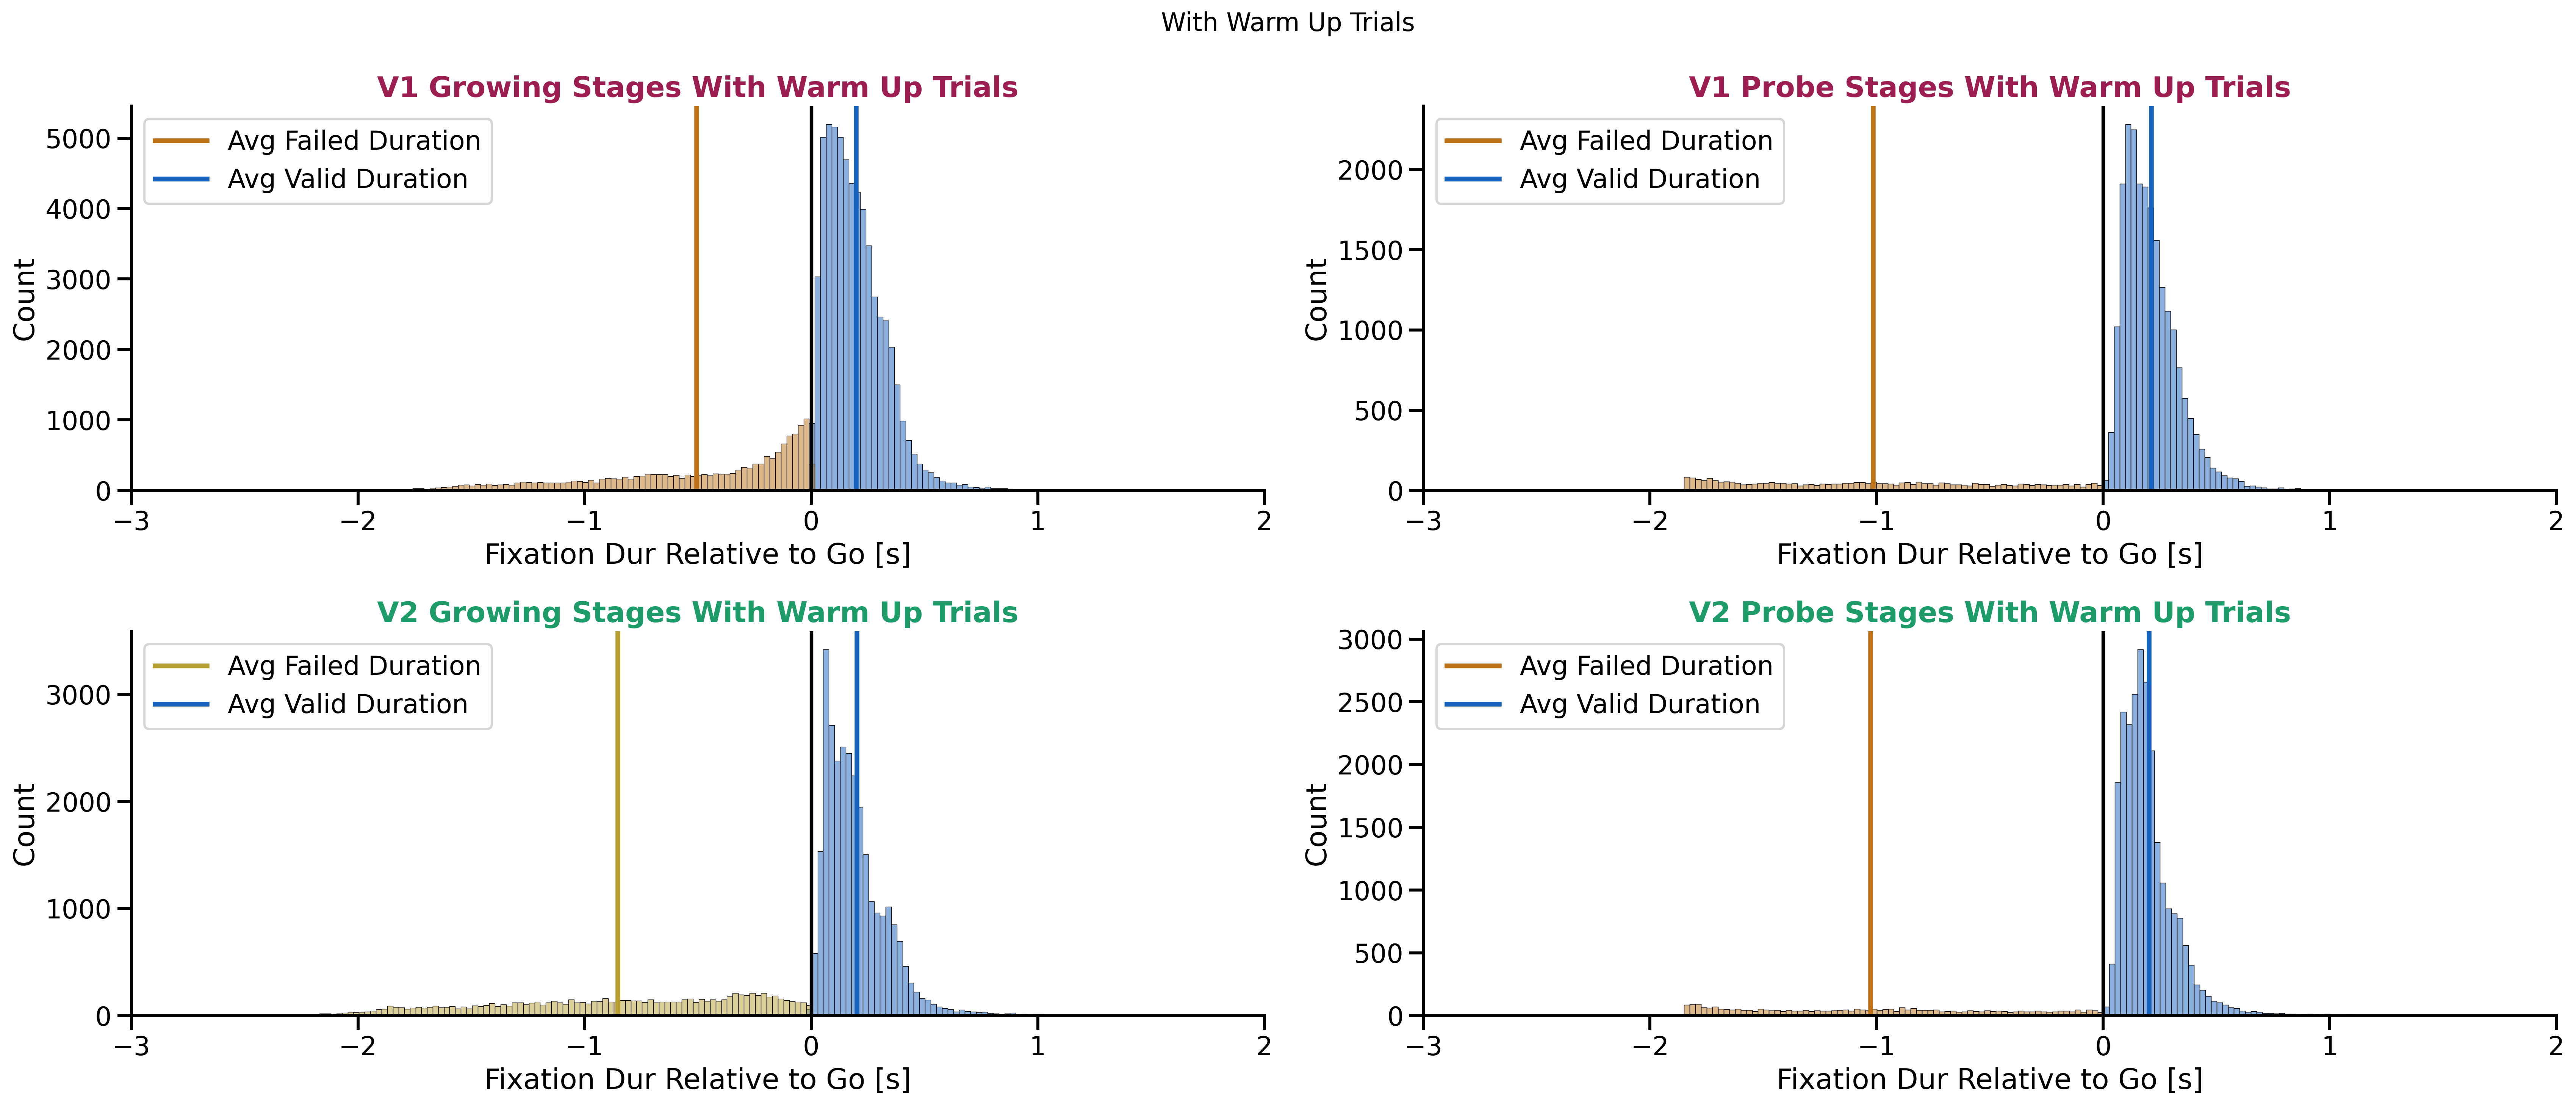

In [19]:
plot_timing_by_stage(
    tdf, title_suffix="Including Warm Up Trials", super_title="With Warm Up Trials"
)

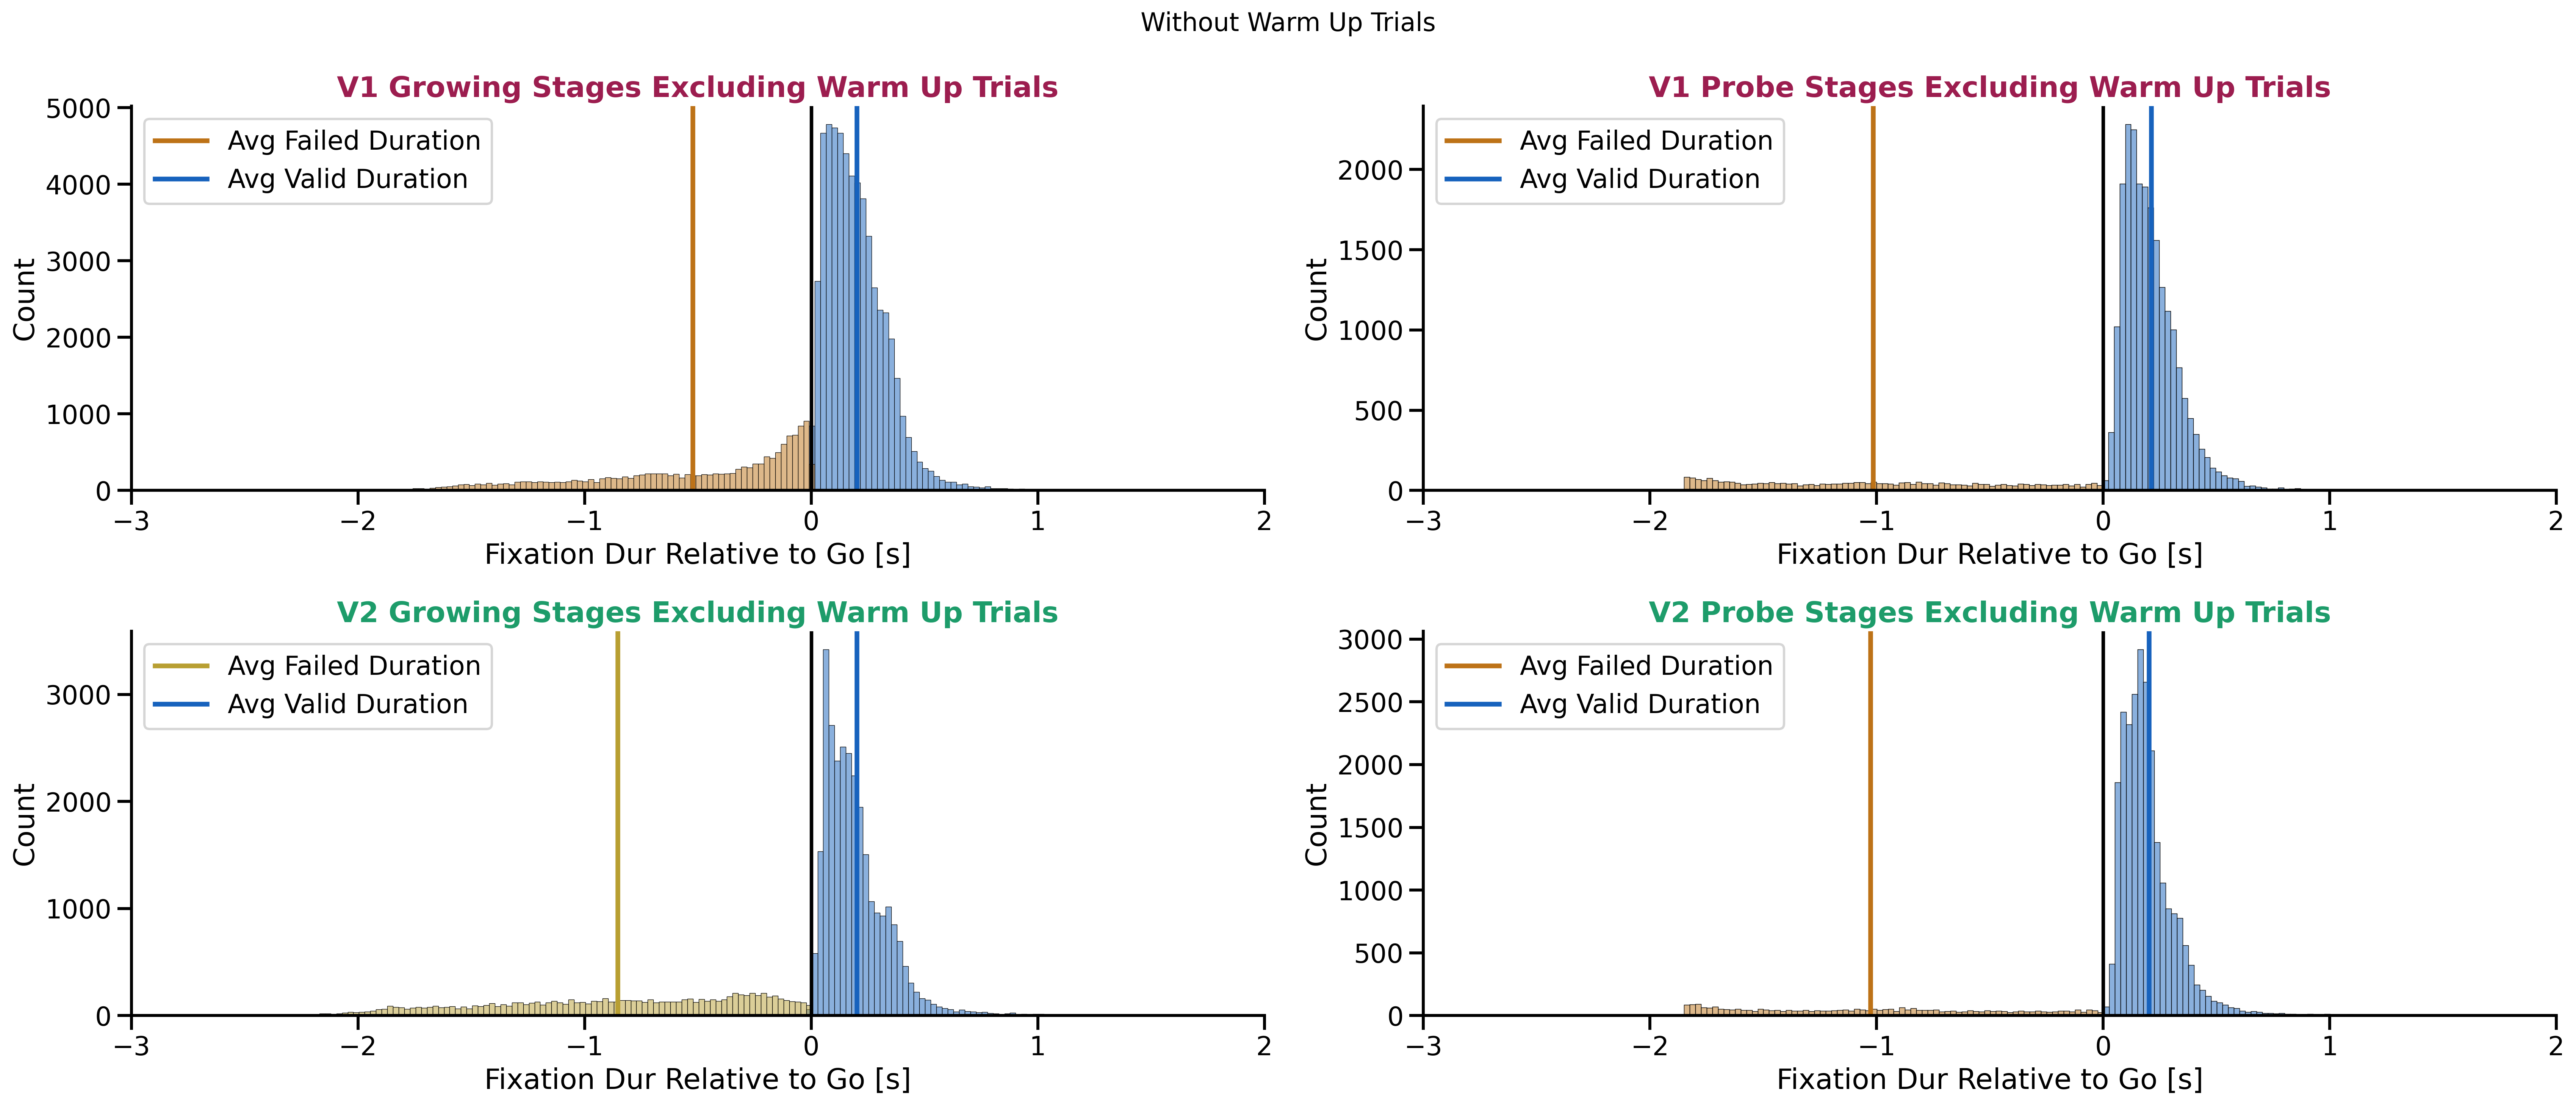

In [20]:
plot_timing_by_stage(
    tdf_no_warm_up,
    title_suffix="Excluding Warm Up Trials",
    super_title="Without Warm Up Trials",
)

### 3. Over Time


In [28]:
def plot_cpoke_timing_over_days(df, title_suffix):
    fix_experiment = ["V1"]
    xlim = (-0.5, 11)
    ylim = (-2, 1)
    xlabel = "Days in Fixation Growth Stage"
    max_days = 10
    v1_marker = "X"
    v2_marker = "^"

    # First plot for V1
    fig, ax = pu.make_fig()
    v1_df = df.query("stage in @growing_stages and fix_experiment == 'V1'").copy()
    viz.FixationGrower.plots.plot_cpoke_fix_stats_relative_prettier(
        v1_df,
        relative_to_stage=5,
        rotate_x_labels=False,
        title=f"V1 Summary {title_suffix}",
        ax=ax,
        max_days=max_days,
        marker=v1_marker,
        markersize=10,
        title_color=pu.ALPHA_V1_color,
    )
    ax.set(xlabel=xlabel, ylim=ylim, xlim=xlim)

    # Second plot for V2
    fig, ax = pu.make_fig()
    v2_df = df.query("stage in @growing_stages and fix_experiment == 'V2'").copy()
    viz.FixationGrower.plots.plot_cpoke_fix_stats_relative_prettier(
        v2_df,
        relative_to_stage=5,
        rotate_x_labels=False,
        title=f"V2 Summary {title_suffix}",
        ax=ax,
        max_days=max_days,
        marker=v2_marker,
        markersize=10,
        title_color=pu.ALPHA_V2_color,
    )
    ax.set(xlabel=xlabel, ylim=ylim, xlim=xlim)

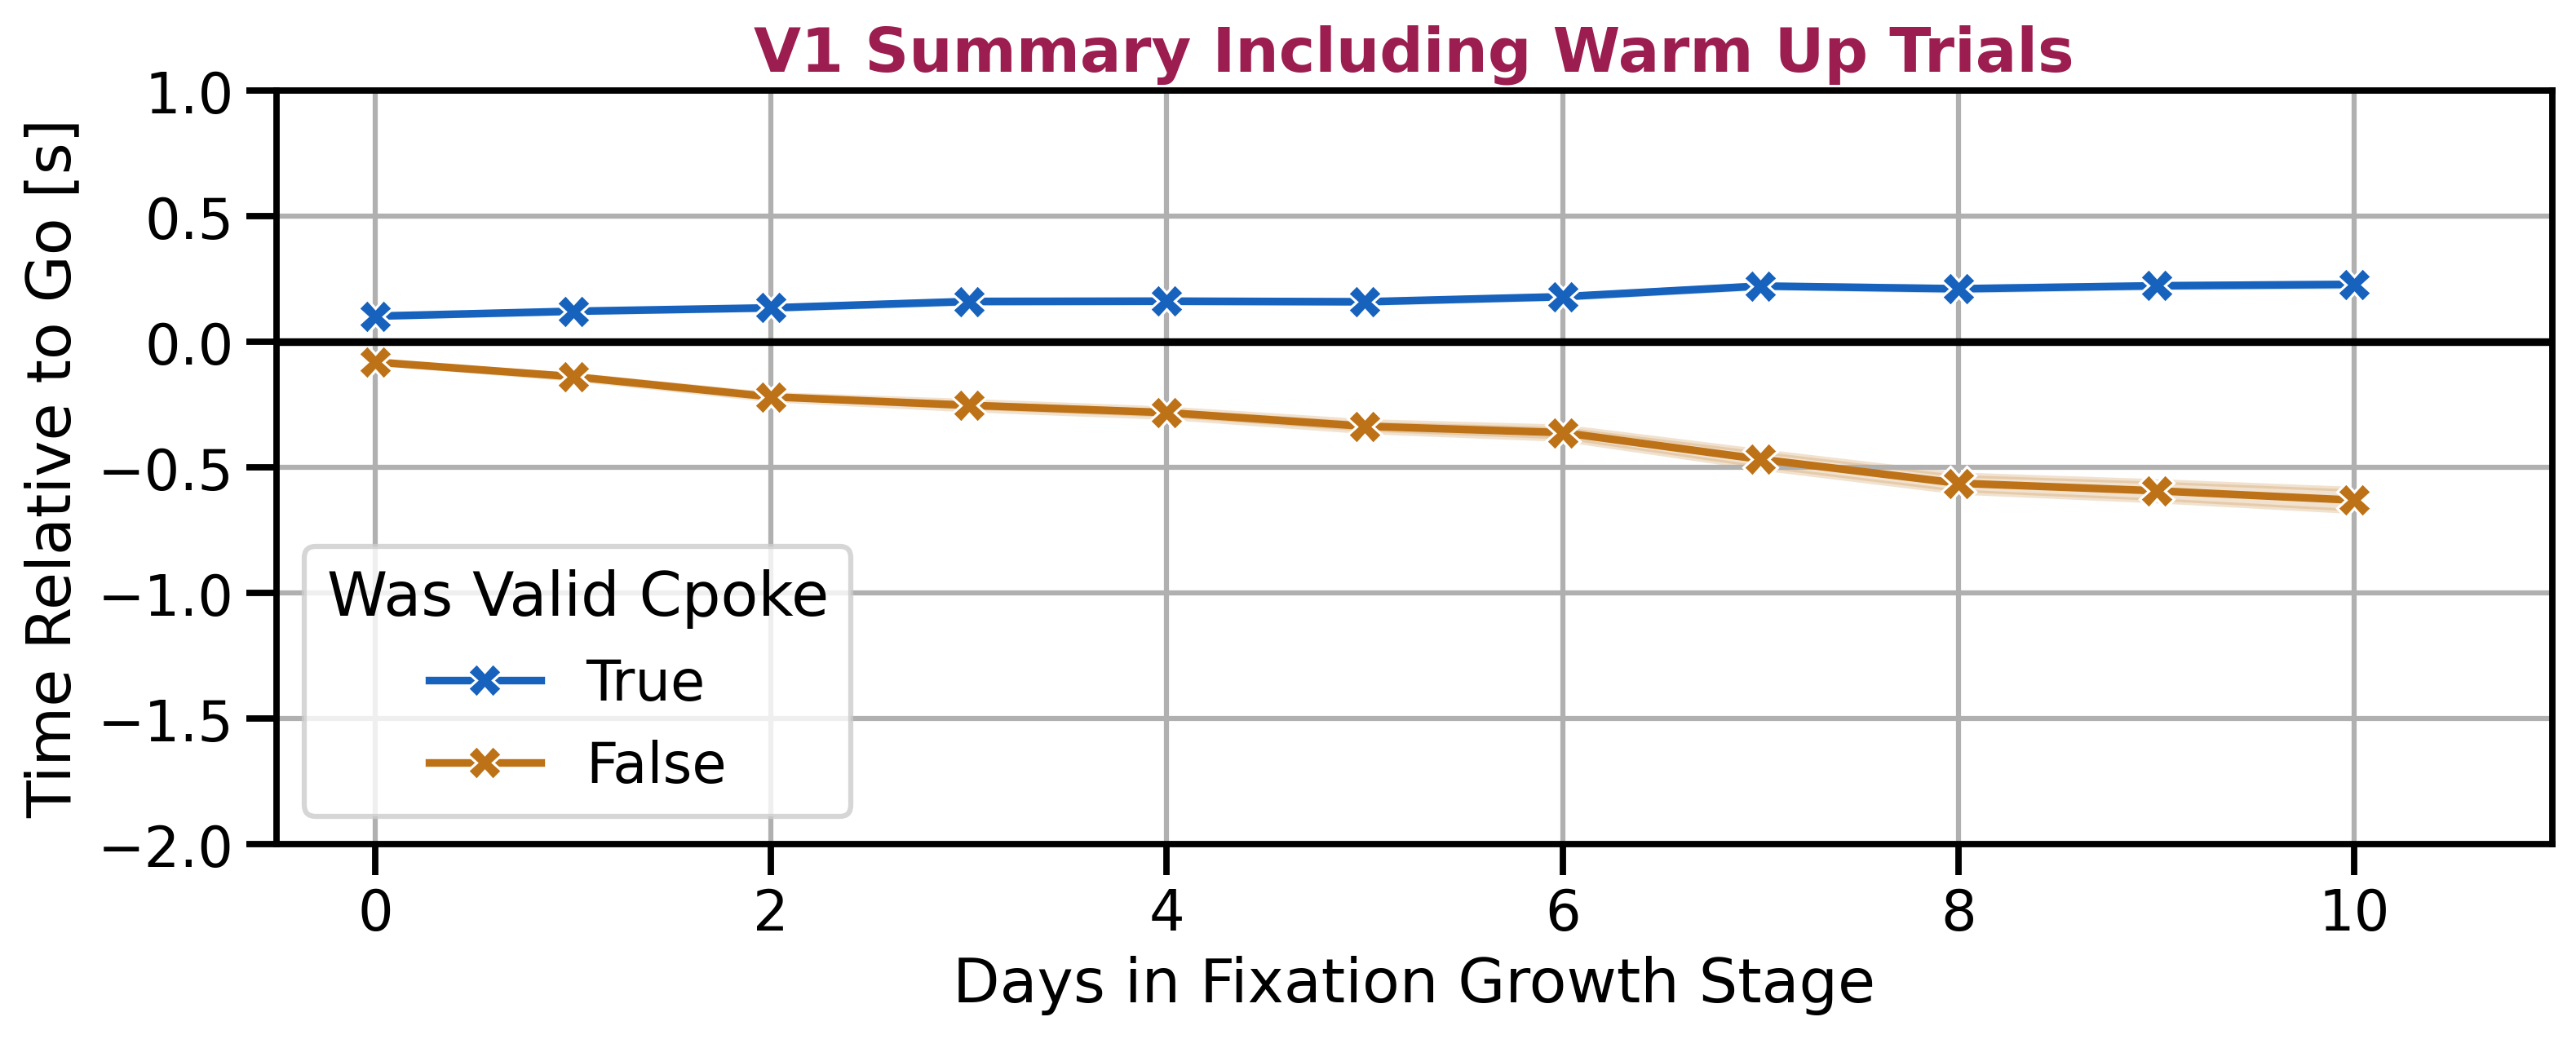

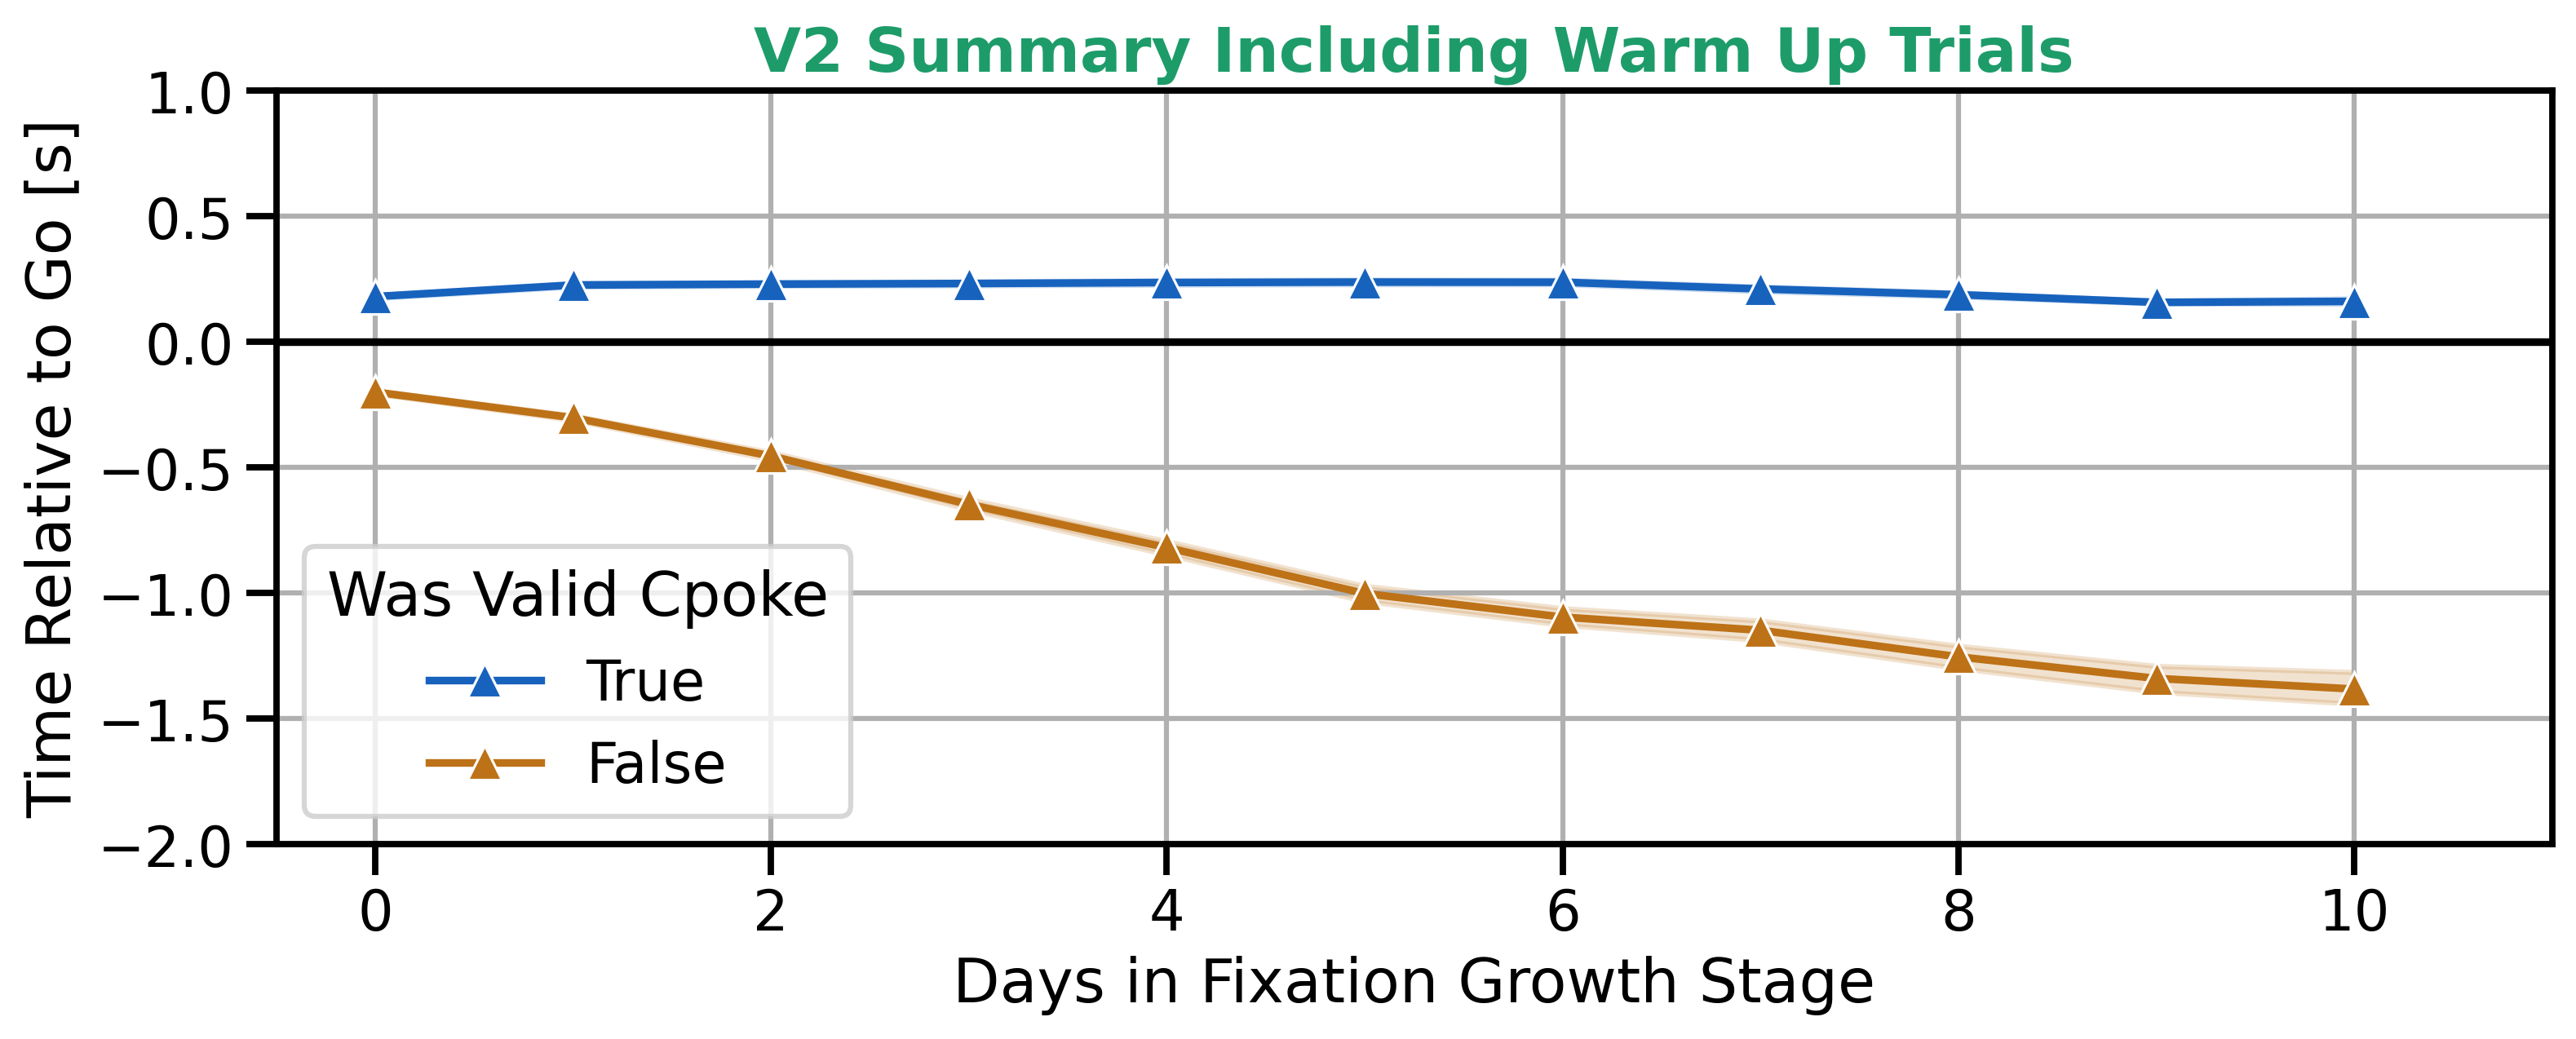

In [29]:
plot_cpoke_timing_over_days(tdf, title_suffix="Including Warm Up Trials")

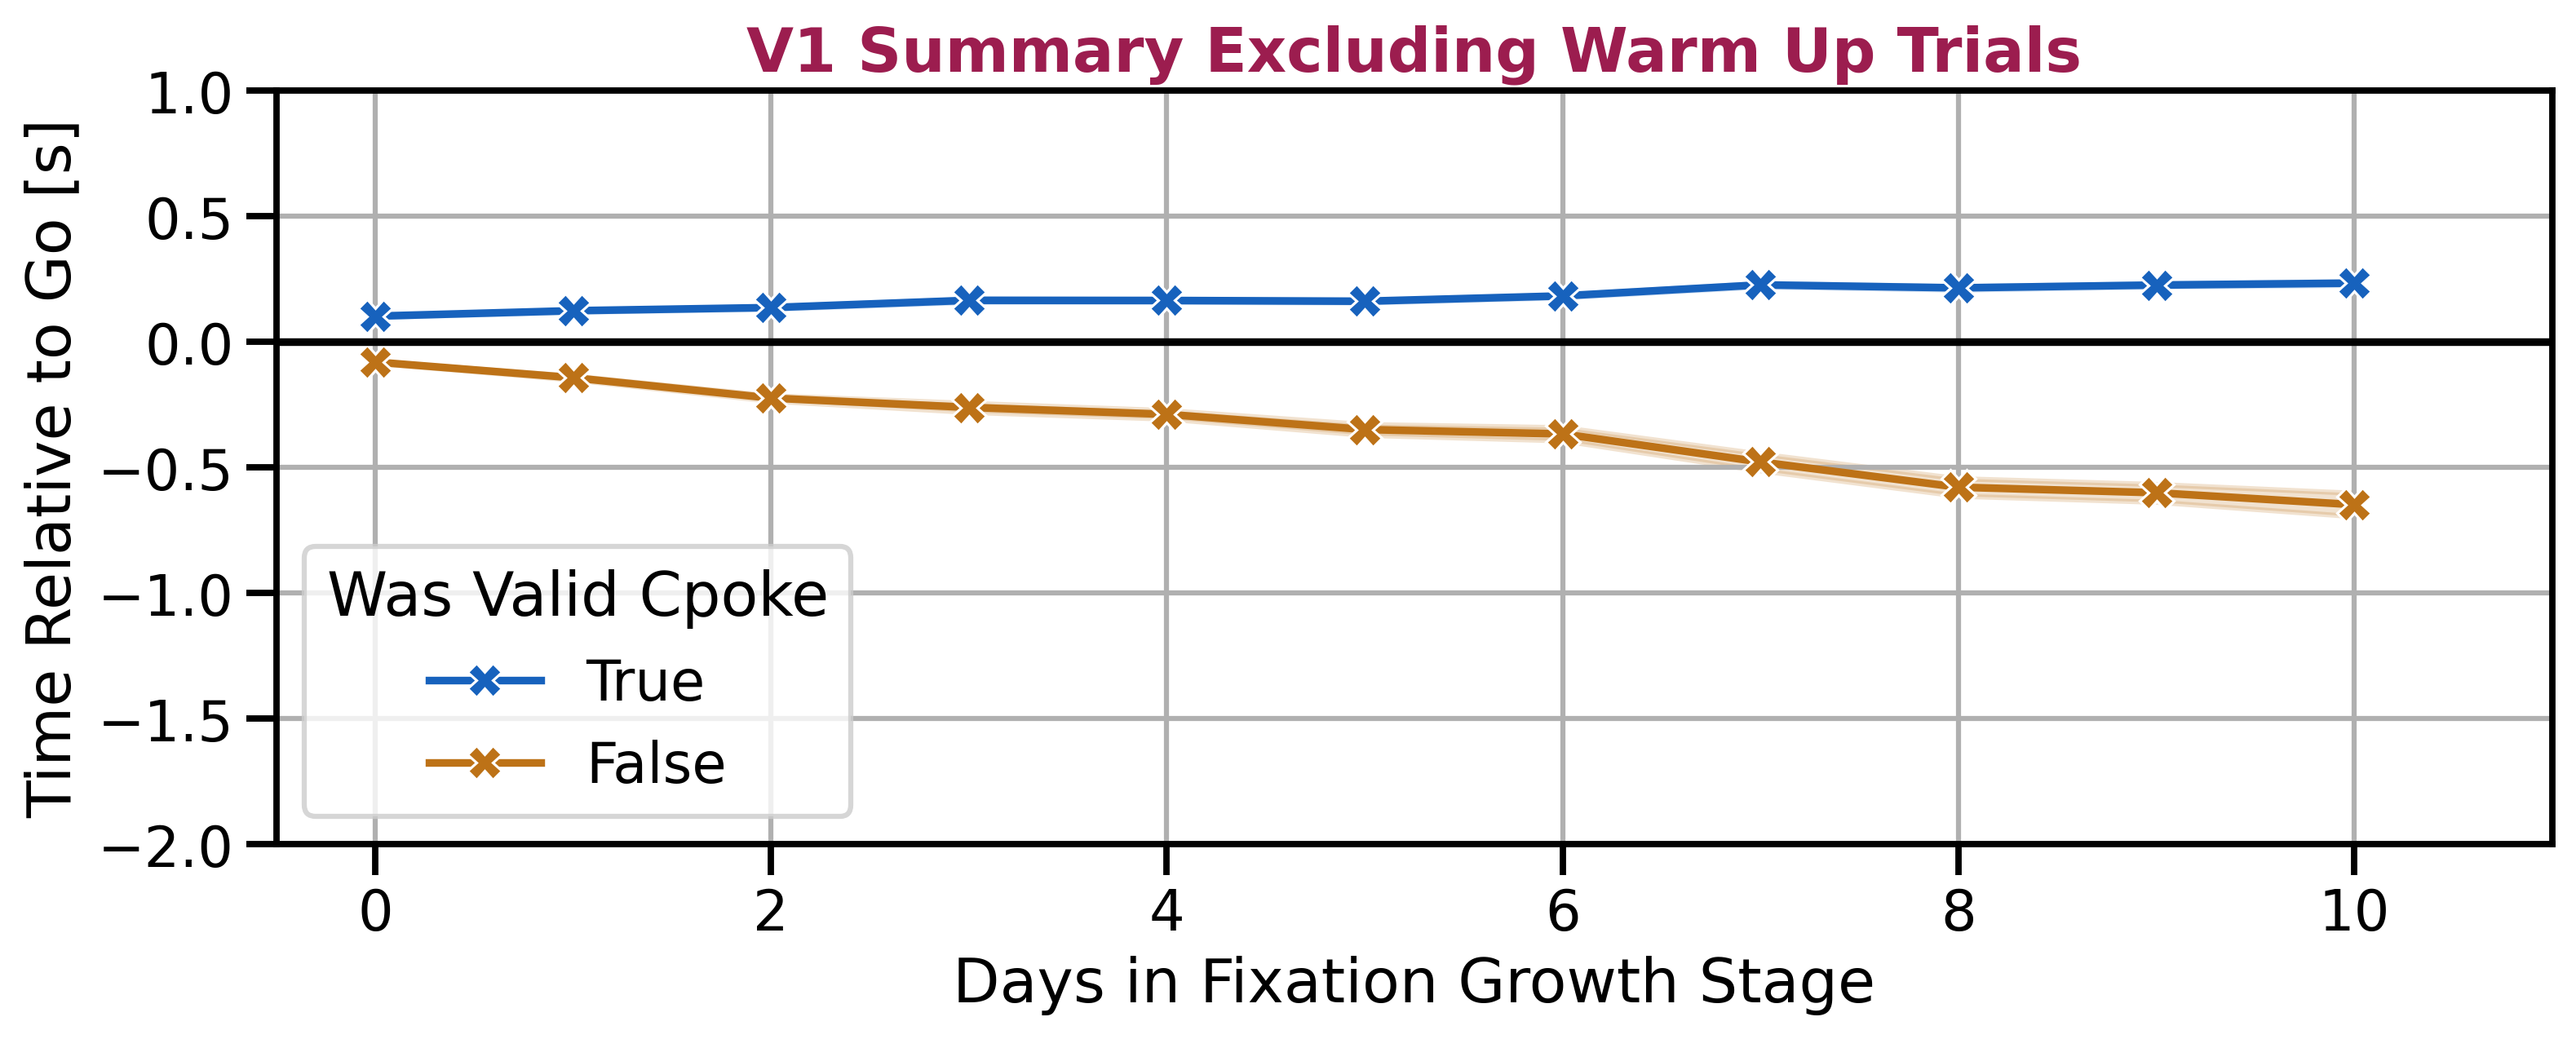

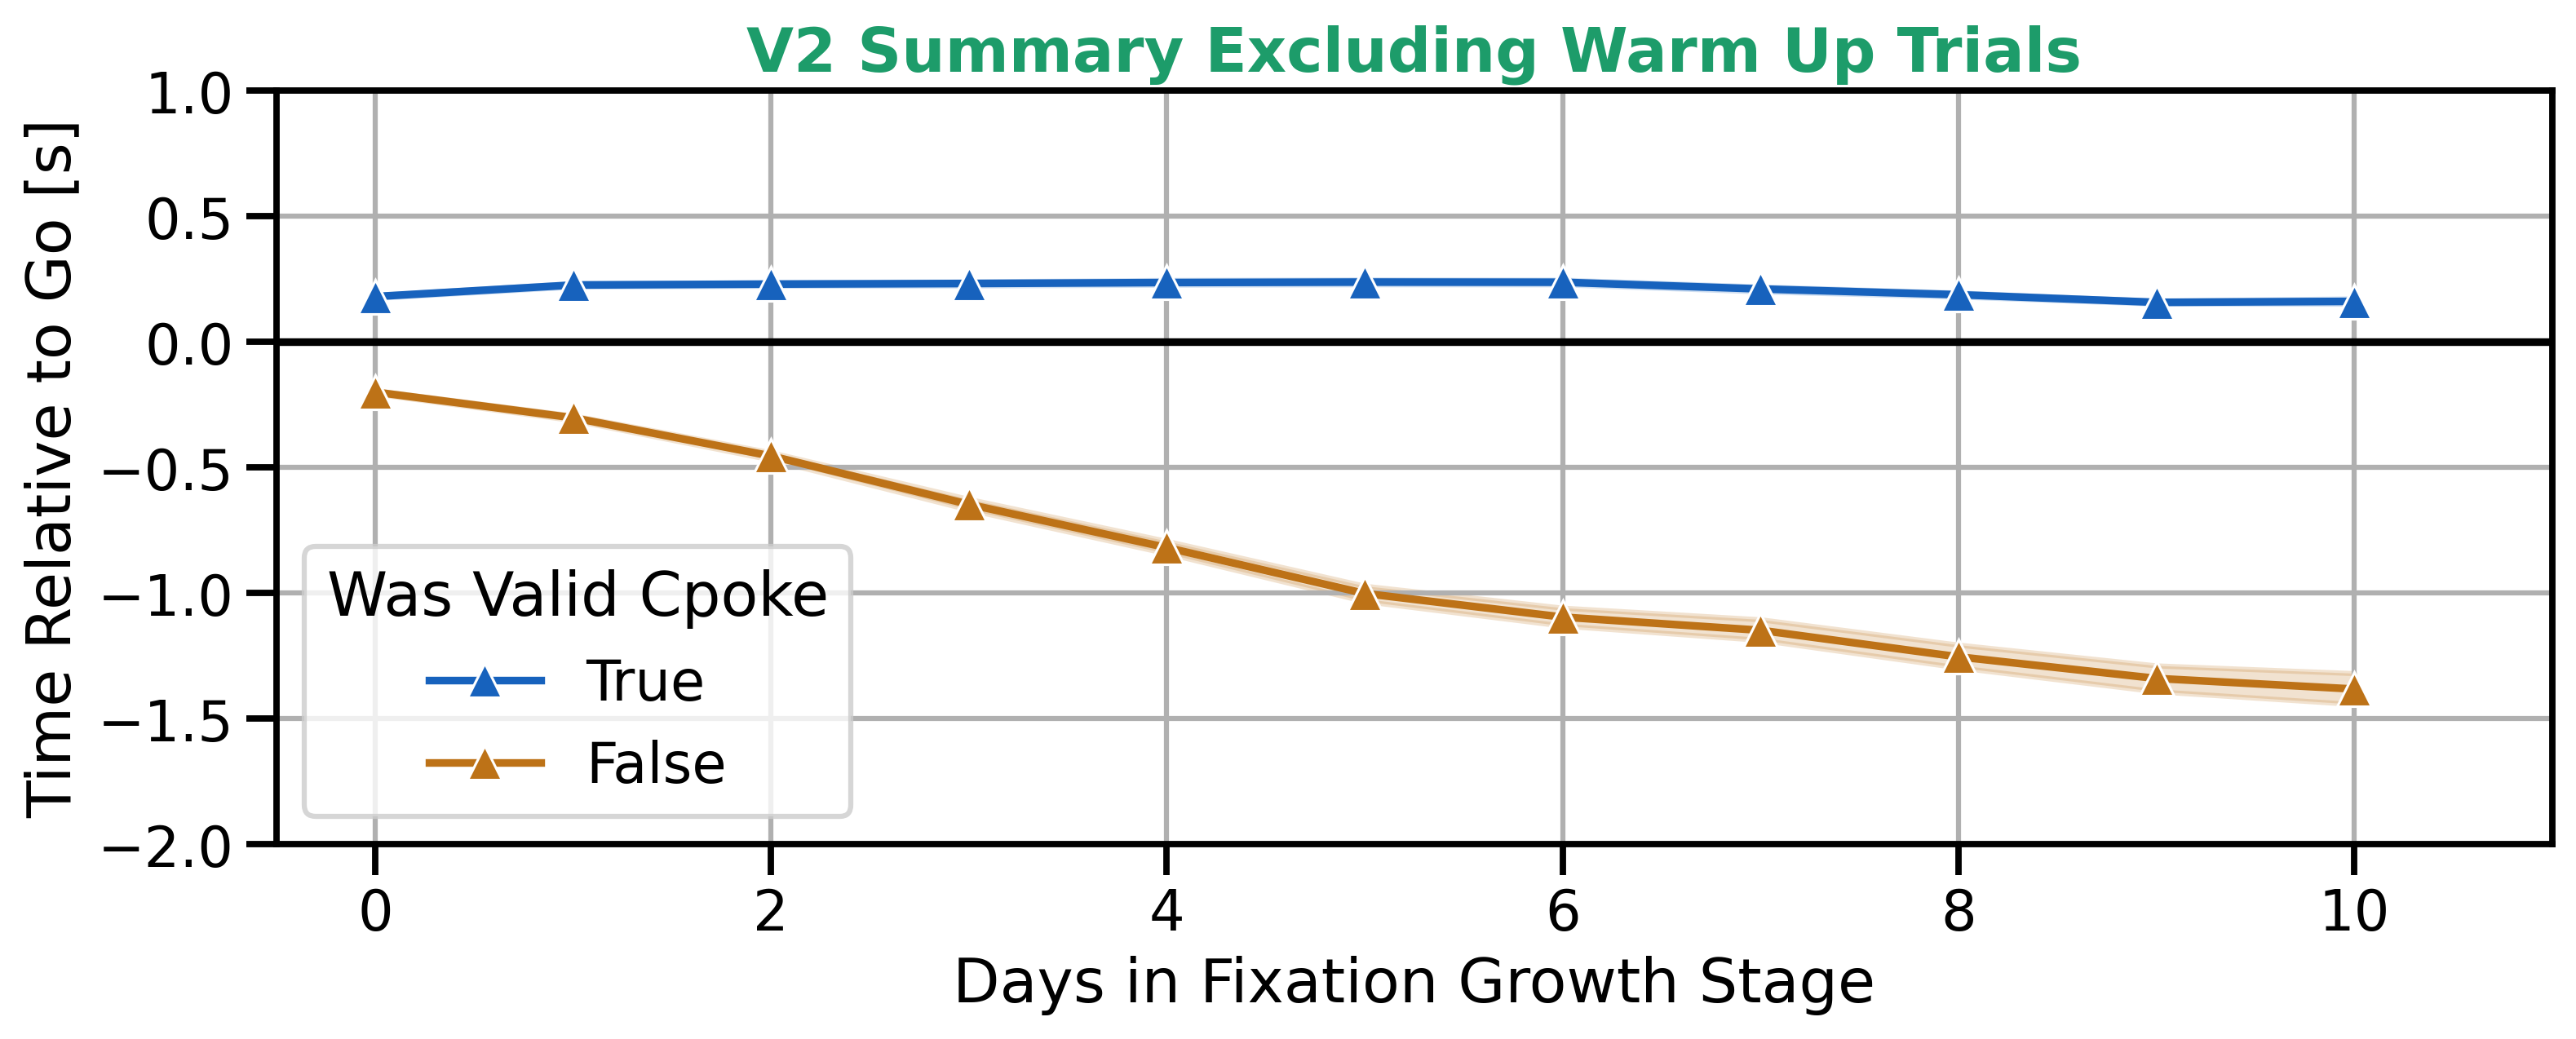

In [30]:
plot_cpoke_timing_over_days(tdf_no_warm_up, title_suffix="Excluding Warm Up Trials")

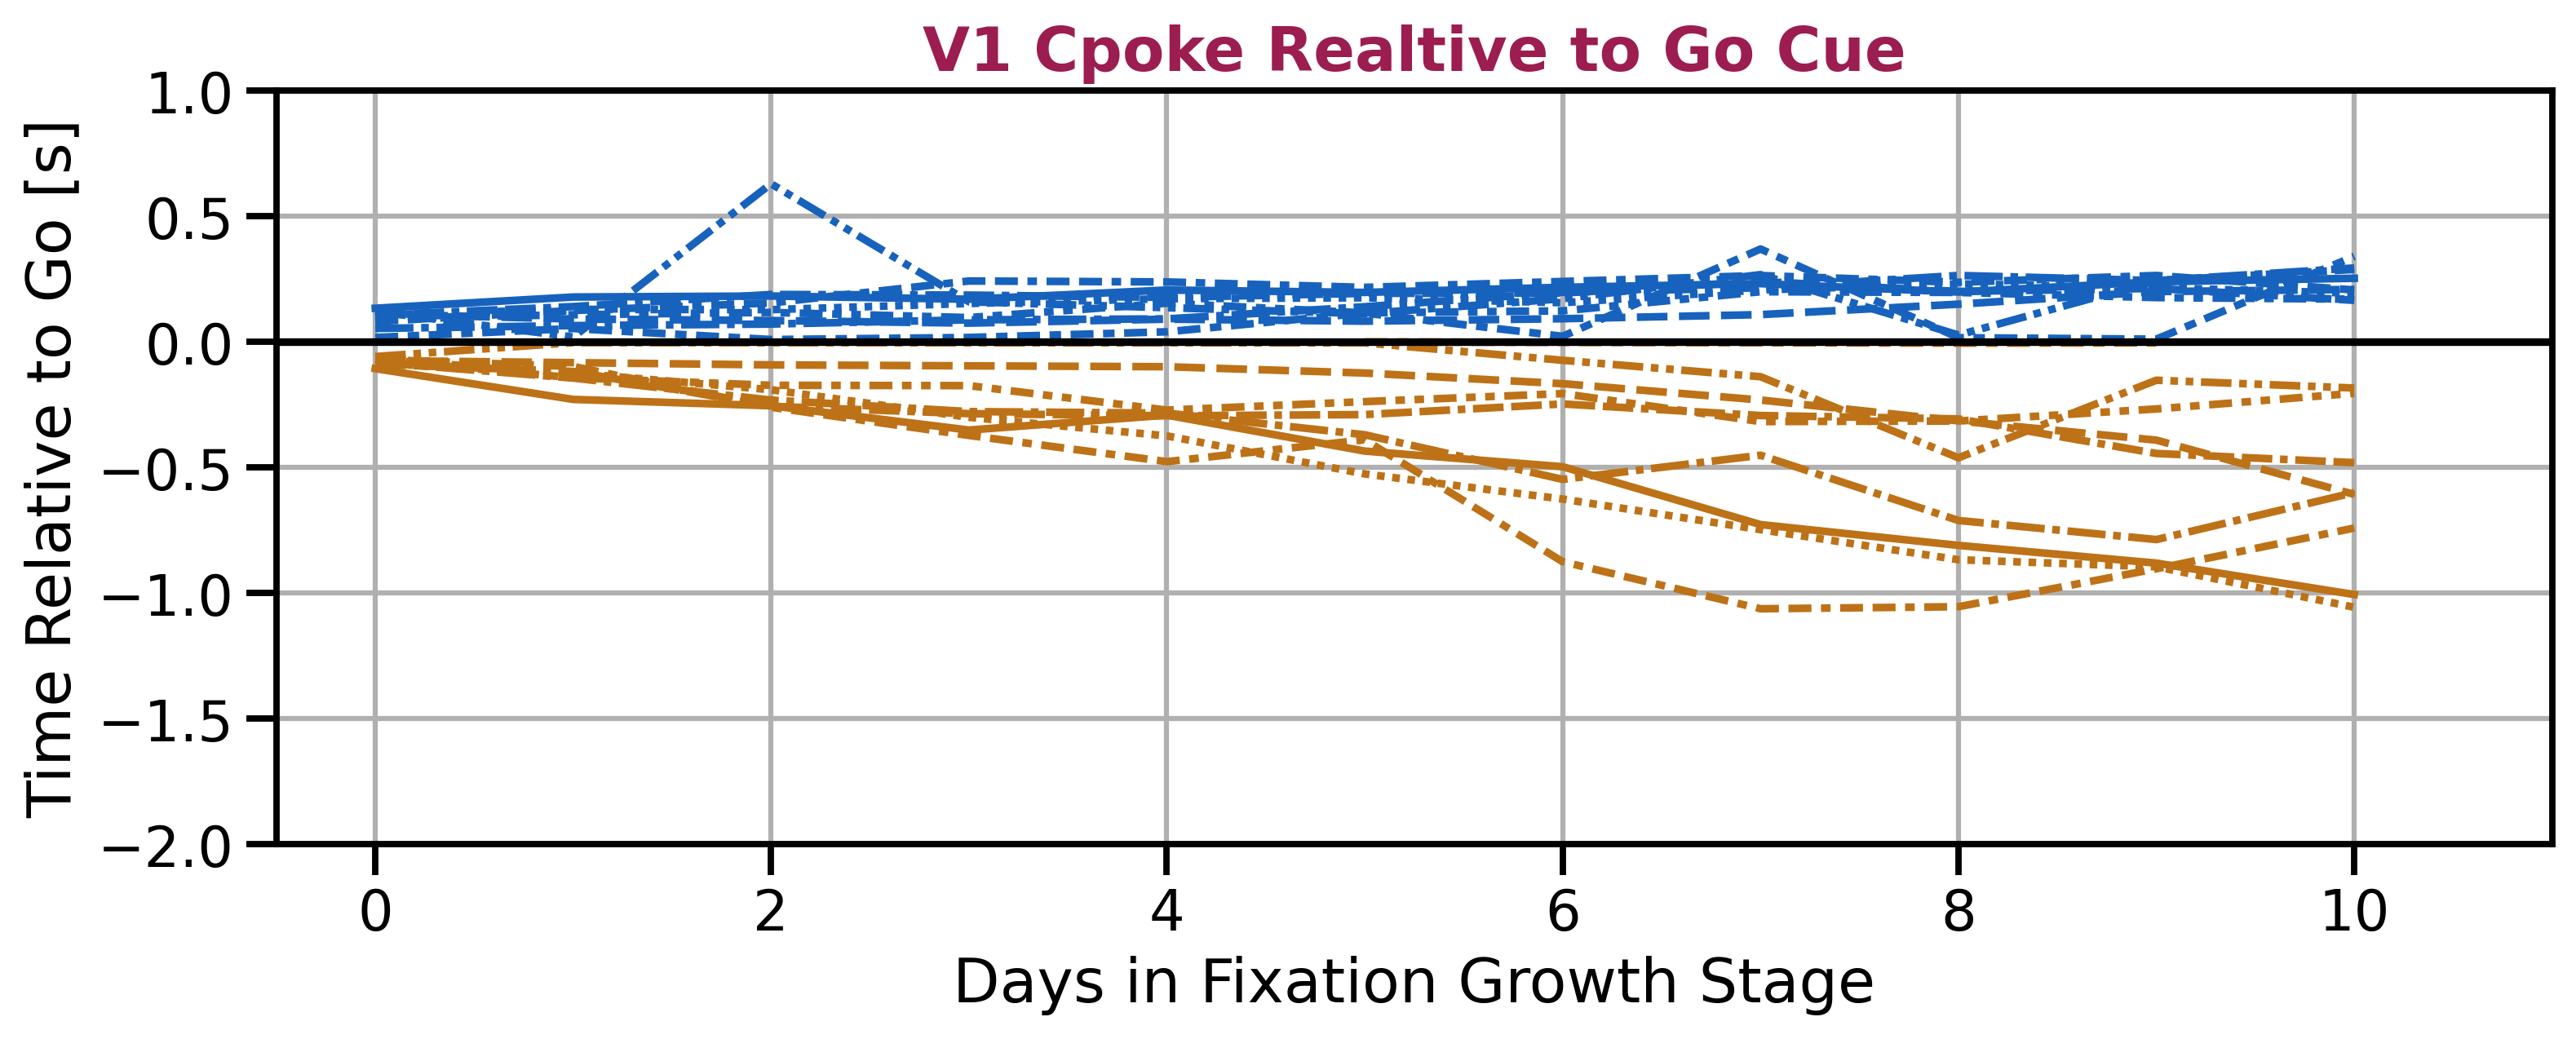

In [32]:
fix_experiment = ["V1"]
xlim = (-0.5, 11)
ylim = (-2, 1)
xlabel = "Days in Fixation Growth Stage"
max_days = 10
v1_marker = "X"
v2_marker = "^"
fig, ax = pu.make_fig()
viz.FixationGrower.plots.plot_cpoke_fix_stats_relative_prettier(
    tdf.query("fix_experiment in @fix_experiment and stage in @growing_stages").copy(),
    relative_to_stage=5,
    rotate_x_labels=False,
    title="V1 Cpoke Relative to Go Cue",
    style="animal_id",
    max_days=max_days,
    marker=None,
    ax=ax,
    errorbar=None,
    title_color=pu.ALPHA_V1_color,
)

ax.legend(bbox_to_anchor=(1.05, 1))
ax.set(ylim=ylim, xlim=xlim, xlabel=xlabel)
ax.get_legend().remove()

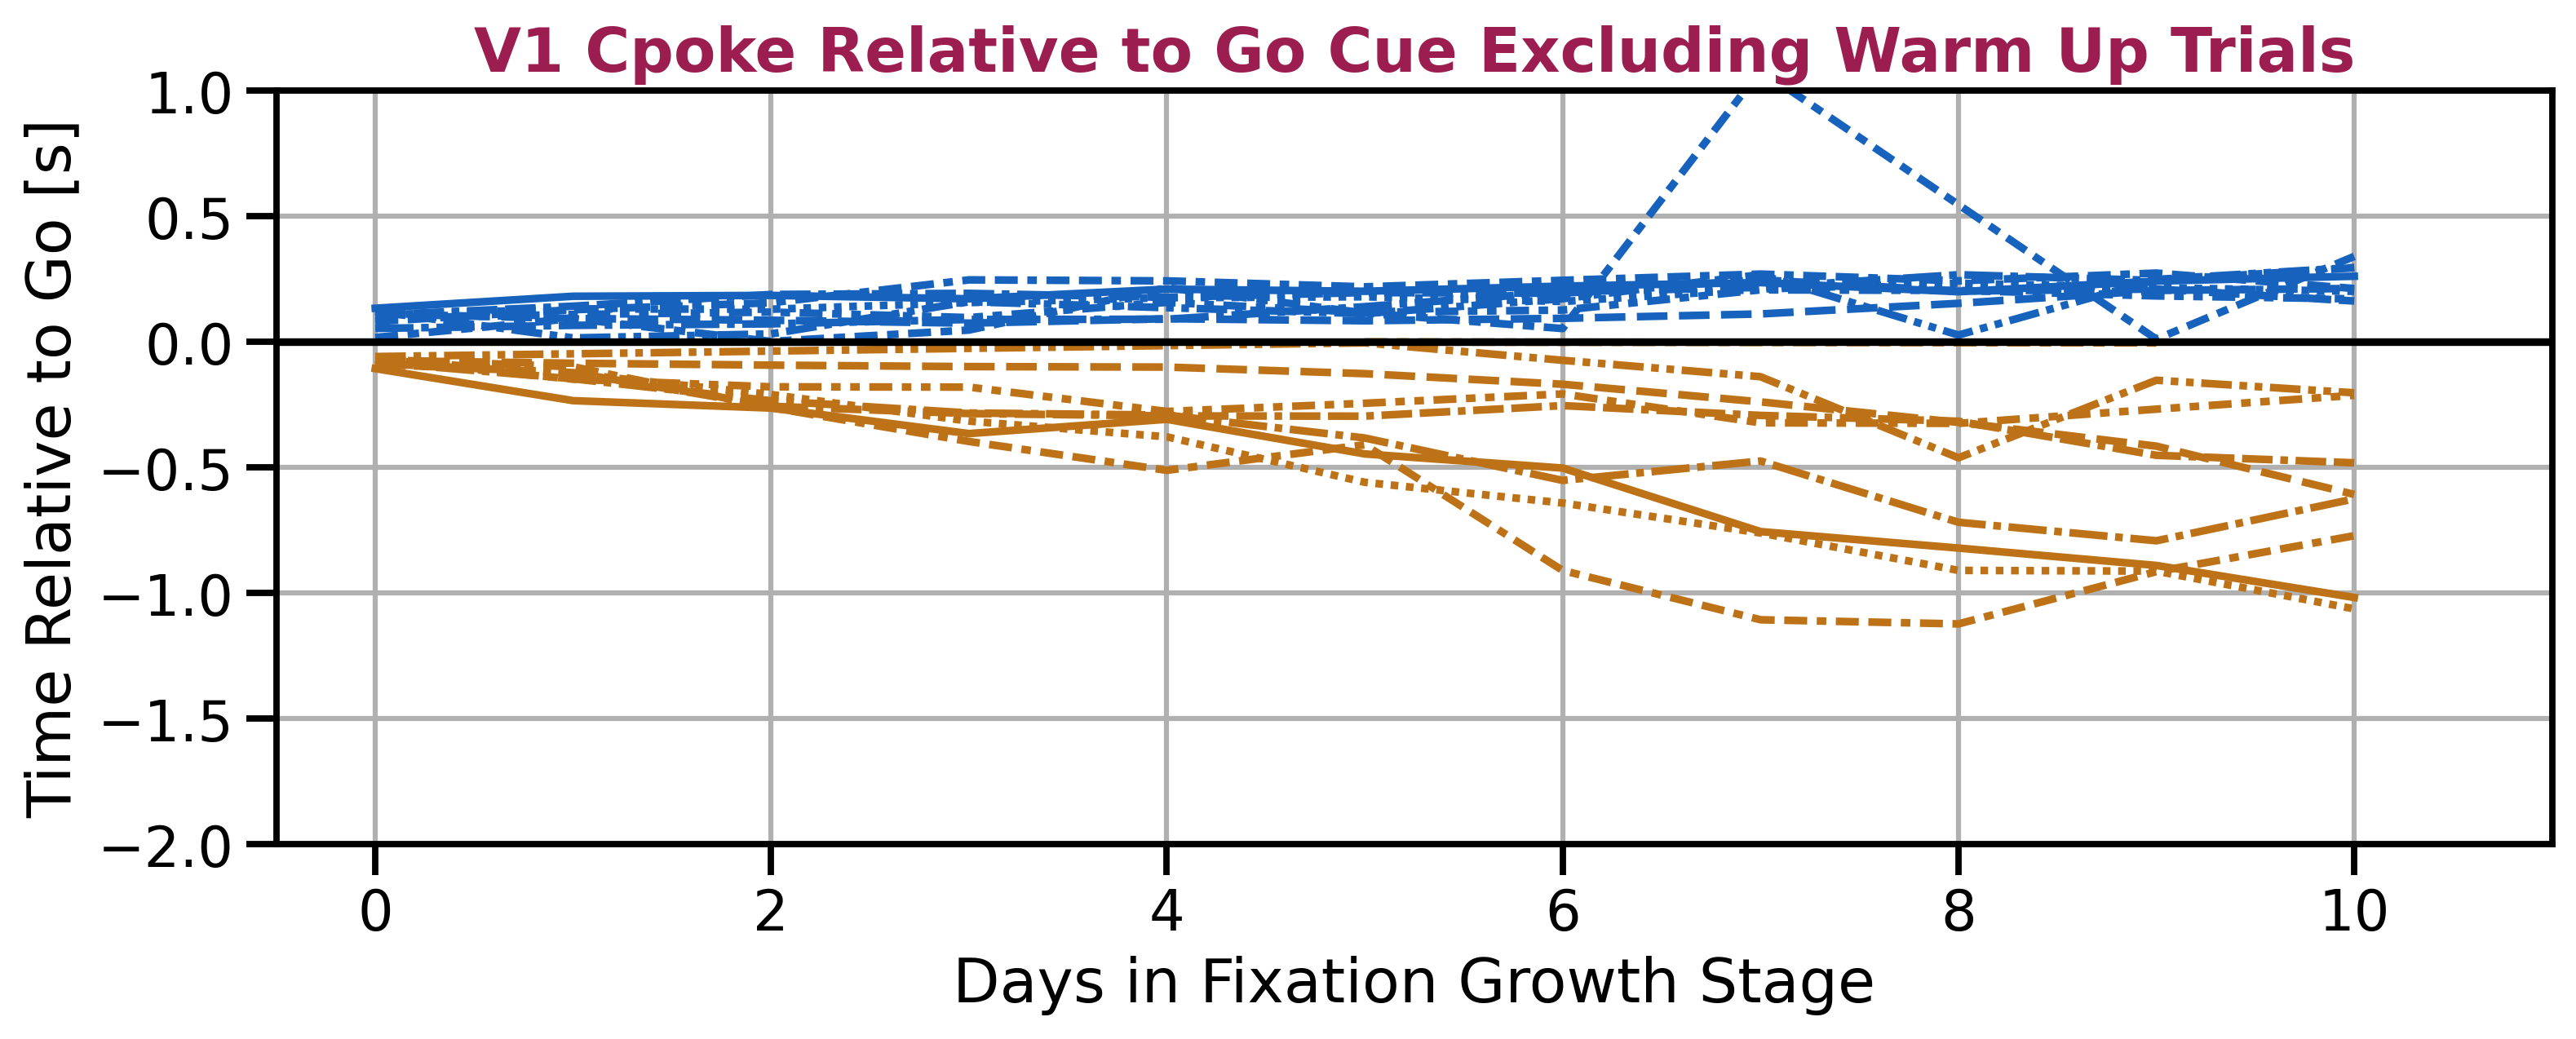

In [34]:
fig, ax = pu.make_fig()
viz.FixationGrower.plots.plot_cpoke_fix_stats_relative_prettier(
    tdf_no_warm_up.query(
        "fix_experiment in @fix_experiment and stage in @growing_stages"
    ).copy(),
    relative_to_stage=5,
    rotate_x_labels=False,
    title="V1 Cpoke Relative to Go Cue Excluding Warm Up Trials",
    style="animal_id",
    max_days=max_days,
    marker=None,
    ax=ax,
    errorbar=None,
    title_color=pu.ALPHA_V1_color,
)

ax.legend(bbox_to_anchor=(1.05, 1))
ax.set(ylim=ylim, xlim=xlim, xlabel=xlabel)
ax.get_legend().remove()